In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

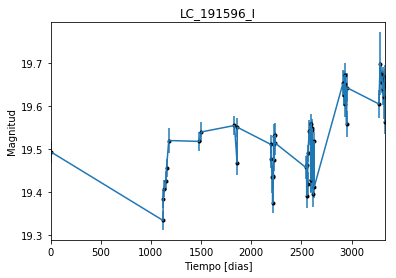

In [2]:
data = np.genfromtxt('LC_191596_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_191596_I')
plt.savefig("LC_191596_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

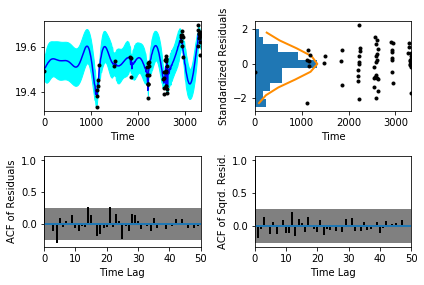

In [5]:
sample.assess_fit()

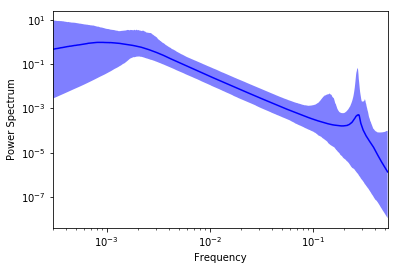

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

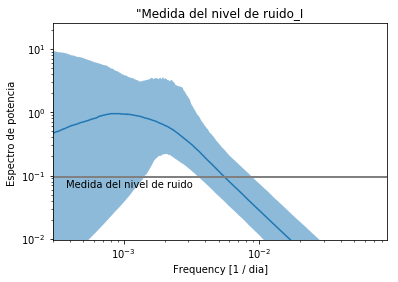

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_191596_I')
plt.title('"Medida del nivel de ruido_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_191596_I')

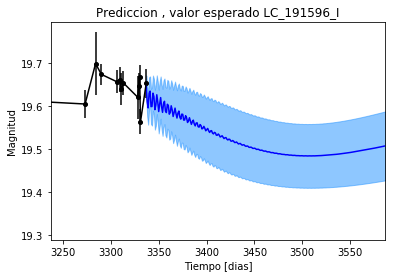

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_191596_I')

Text(0.5,1,'Prediccion, Caminos simulados  LC_191596_I')

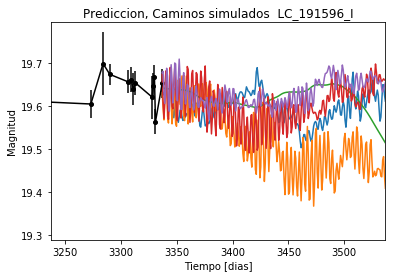

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_191596_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


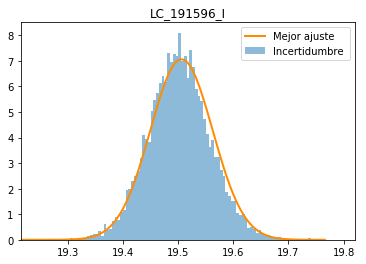

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_191596_I')
plt.savefig("Mejor_ajuste_LC_191596_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_191596_I')

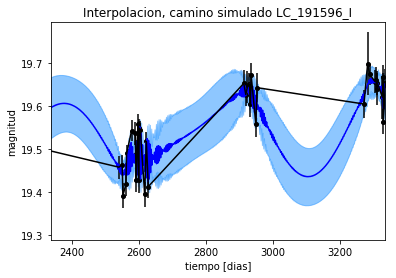

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_191596_I')

Text(0.5,1,'Interpolacion, camino simulado LC_191596_I')

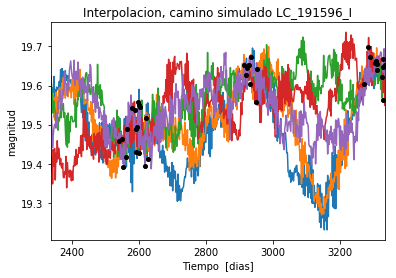

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_191596_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 601.964668723
Median: 0.00526073696977
Standard deviation: 0.0644834547827
68% credibility interval: [ 0.00276154  0.01215744]
95% credibility interval: [ 0.00100938  0.07702491]
99% credibility interval: [ 0.00067574  0.52024095]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1046.51820966
Median: 0.00517737865792
Standard deviation: 0.0305625175497
68% credibility interval: [ 0.00267994  0.01146275]
95% credibility interval: [ 0.00094992  0.04620187]
99% credibility interval: [ 0.00056352  0.17333581]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 324.971821989
Median: 0.000850046604773
Standard deviation: 0.287370308565


In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 186.972863382
Median: 114.236083137
Standard deviation: 3.04772803094
68% credibility interval: [ 109.94993948  116.0908958 ]
95% credibility interval: [ 106.07420261  117.14500389]
99% credibility interval: [ 104.07585858  117.69269767]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 351.010263347
Median: 0.115222432877
Standard deviation: 1.89187732791
68% credibility interval: [ 0.0527431   3.04400405]
95% credibility interval: [ 0.03124744  6.35315418]
99% credibility interval: [ 0.02490026  6.76156076]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 210.224125489
Median: 3.11313587594
Standard deviation: 9.29606150254
68% credibility interval: [  2.81542131  21.19716897]
95% credibility interval: [  0.66727789  

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1287.10951428
Median: 5.19851685368e+40
Standard deviation: 1.60396967154e+151
68% credibility interval: [  6.16570402e-040   3.46214706e+100]
95% credibility interval: [  6.77263734e-074   1.26540661e+147]
99% credibility interval: [  9.11116803e-093   9.27995448e+150]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 748.039964998
Median: 19.5246461581
Standard deviation: 0.0311514493331
68% credibility interval: [ 19.49823541  19.55173618]
95% credibility interval: [ 19.46246852  19.5873365 ]
99% credibility interval: [ 19.42542948  19.62149508]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 237.780676867
Median: 0.275933510474
Standard deviation: 0.238724145802
68% credibility interval: [ 0.26504725  0.73152548]
95% credibility interval: [ 0.08402625  0.75895694]
99% credibility interval: [ 0.          0.94043554]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 237.780676867
Median: 0.275933510474
Standard deviation: 0.238724145802
68% credibility interval: [ 0.26504725  0.73152548]
95% credibility interval: [ 0.08402625  0.75895694]
99% credibility interval: [ 0.          0.94043554]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 109.04620931
Median: 0.000372854865287
Standard deviation: 0.00098143796

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 186.972863382
Median: 114.236083137
Standard deviation: 3.04772803094
68% credibility interval: [ 109.94993948  116.0908958 ]
95% credibility interval: [ 106.07420261  117.14500389]
99% credibility interval: [ 104.07585858  117.69269767]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 263.820049774
Median: 0.00812148866592
Standard deviation: 0.00466023963535
68% credibility interval: [ 0.00552403  0.01299092]
95% credibility interval: [ 0.00397152  0.02136054]
99% credibility interval: [ 0.0033508   0.02783855]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 215.743622006
Median: 1.0546270742
Standard deviation: 0.240604919639
68% credibility interval: [ 0.87857977  1.3217241 ]
95% credibility interval: [ 0.73270868  1.69767929]
99% credibility interval: [ 0.63470658  1.90345832]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 329.297157632
Median: 6.58108360348e-43
Standard deviation: 0.350990925408
68% credibility interval: [  7.34641731e-103   9.03705928e-002]
95% credibility interval: [  3.45014810e-149   1.25003590e+000]
99% credibility interval: [  2.86176359e-152   2.14790001e+000]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 601.964668723
Median: (-0.0330541852334-1.69486996899j)
Standard deviation: 1.55370524115
68% credibility interval: [-0.07638745-1.11637203j -0.01735129-1.66969273j]
95% credibility interval: [-0.48396179+0.j         -0.00634211-1.71858053j]
99% credibility interval: [-3.26877031-0.01374089j -0.00424577-4.59320771j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1046.51820966
Median: (-0.0325304295131+1.7230504753j)
Standard deviation: 1.51219034676
68% credibility interval: [-0.07202258+1.57066907j -0.01683857+1.65259402j]
95% credibility interval: [-0.29029489+0.89359217j -0.00596851+1.99871261j]
99% credibility interval: [-1.08910101+0.0065235j  -0.00354068+4.57609443j]
Posterior summary for parameter ar_roots  ele